In [4]:
from data_utils import *
import IPython.display as ipd
import torch
import utils
from models import SynthesizerTrn
from text.symbols import symbols
from text import text_to_sequence
hps = utils.get_hparams_from_file("configs/multispeaker.json")
import matplotlib.pyplot as plt

net_g = SynthesizerTrn(
  len(symbols),
  hps.data.filter_length // 2 + 1,
  hps.data.hop_length,
  hps.data.sampling_rate,
  hps.train.segment_size // hps.data.hop_length,
  n_speakers=hps.data.n_speakers,
  **hps.model)


In [5]:
def get_text(text):
    text_norm = text_to_sequence(text)
    text_norm = torch.LongTensor(text_norm)
    return text_norm
def tts(txt,sid=0,device="cpu"):
    stn_tst = get_text(txt)
    with torch.no_grad():
        x_tst = stn_tst.unsqueeze(0)
        x_tst_lengths = torch.LongTensor([stn_tst.size(0)])
        spk = torch.LongTensor([sid])
        t1 = time.time()
        res = net_g.to(device).infer(x_tst.to(device), x_tst_lengths.to(device),sid=spk, noise_scale=.667, noise_scale_w=0.8, length_scale=1)
        audio = res[0][0,0].cpu().data.float().numpy()
        f0 = res
        t2 = time.time()
        print("推理时间：", (t2-t1),"s")
    ipd.display(ipd.Audio(audio, rate=hps.data.sampling_rate))
    return f0[-1]

In [2]:
!ls logs_rewrite/ms/G_*

In [6]:
_ = utils.load_checkpoint("ckpts/paimeng.pth", net_g, None)


INFO:root:Loaded checkpoint 'ckpts/paimeng.pth' (iteration 6)


推理时间： 0.19242072105407715 s


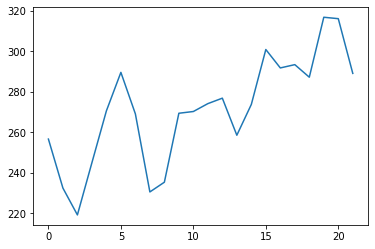

In [10]:
text = "Player431说大家好"
f0 = tts(text, 0)
plt.plot(f0[0,:])